Fine Guidance Sensor Data
===============

The Kepler spacecraft uses Fine Guidance Sensors (FGS) to keep the pointing of the telescope fixed. There are 4 small sensors in the corner of the focal plane. The sensors use guide stars which are chosen based on being bright and with low variability. These stars are measured very rapidly using a short exposure (104ms) with a variable time sampling. Measurements are taken on average every 30 seconds, with some observations being taken on even shorter time frames. The full documentation on the FGS data can be found [here](https://archive.stsci.edu/kepler/manuals/fgs_doc_KSCI-19112.pdf).

Insert picture of detector here

FGS Module Structure
--------------------
There are 4 FGS Modules on the focal plane, one in each corner. There are numbered as 01, 05, 21 and 25 (from the top, left to right). For Kepler there were 10 guide stars per module, for K2 only one guide star is used per module.

FGS Data
--------
Data consist of *centroid* and *flux* data at each read out time. The pixel level data are saved only in rare cases as a Full Frame Image (FFI). Data is provided raw from simple aperture photometry. **????** These are given in simple *.csv* files.

The FGS data from the original Kepler mission and from K2 are now available at MAST [here](https://archive.stsci.edu/missions/kepler/fgs/) and [here](https://archive.stsci.edu/missions/2/fgs/). There are **44** unique Kepler FGS targets and **51** unique K2 FGS targets. Both archives contain 
* FFI
* FGS Light Curves
* Ancilliary FGS Reference table

The Ancilliary FGS Reference table can be used to find the positions of each target on each FGS module

Tutorial
--------
In this tutorial we will download and plot the FGS data. The FGS.py file supplied with this tutorial can be used to do this. First import the FGS routines.

In [153]:
import FGS
import matplotlib.pyplot as plt
%matplotlib inline

datadir=''

**Plotting Ancilliary Data**

We can first take a look at the ancilliary data to find out more about the FGS targets. The 'table' function will download and consolidate the FGS ancilliary data. Below we plot the magnitude distribution of the FGS stars. K2 requires brighter guide stars in general.

Available tags:  ['KEPLER_ID', 'RA', 'DEC', 'KEPMAG', 'mission']


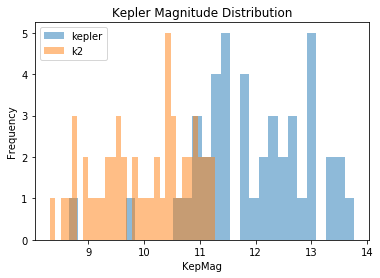

In [144]:
tab=FGS.table()  #Use the 'table' function to grab the FGS data
print 'Available tags: ',list(tab.keys())

plt.hist(tab.KEPMAG[tab.mission=='kepler'],30
             ,alpha=0.5,label='kepler')
plt.hist(tab.KEPMAG[tab.mission=='k2'],30
             ,alpha=0.5,label='k2')
plt.legend()
plt.title('Kepler Magnitude Distribution')
plt.ylabel('Frequency')
plt.xlabel('KepMag')

The table also contains the Kepler ID's of each of the FGS targets.

In [145]:
print np.asarray(tab.KEPLER_ID)[0:5]

[220475282 205336529 203062040 205497868 204938966]


**Obtain full FGS data**

The FGS data can be quite large, due to the high time sampling. The Kepler FGS data is much larger as each file contains 10 stars. The 'get_data' function automatically downloads FGS data to a data directory. You can specify to download just one quarter if you have limited time or disk space.

In [136]:
#Get the full Kepler FGS data from MAST, with every quarter.
#FGS.get_data(datadir,mission='kepler')

#Get the first campaign of K2 FGS data from MAST
FGS.get_data(datadir,mission='k2',quarters=1)

**Plot FGS Light Curve**

Using the 'gen_lc' routine you can generate an FGS light curve. This routine

* Cleans bad pointings
* Removes a polynomial trend from flux
* Sigma clips flux
* Stitches quarters together

By specifying the 'quarters' keyword you can select only the quarters that are relevant to your work.

Cannot download data
Cannot download data
Cannot download data


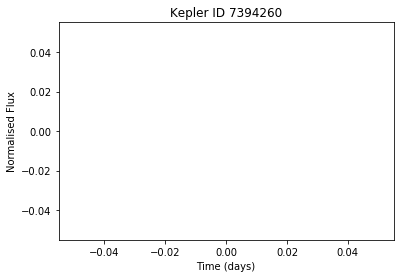

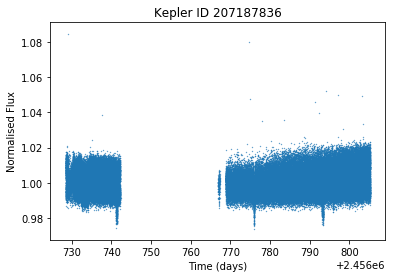

In [154]:
reload(FGS)
#Create a lightcurve for Kepler ID 2564891 using just quarter 2.
ID=7394260
time,flux,column,row=FGS.gen_lc('',ID=ID,quarters=[3,4,5])
plt.figure()
plt.scatter(time,flux,s=0.1)
plt.xlabel('Time (days)')
plt.ylabel('Normalised Flux')
plt.title('Kepler ID '+str(ID))

#Create a lightcurve for Kepler ID 2564891
ID=207187836
time,flux,column,row=FGS.gen_lc('',ID=ID)
plt.figure()
plt.scatter(time,flux,s=0.1)
plt.xlabel('Time (days)')
plt.ylabel('Normalised Flux')
plt.title('Kepler ID '+str(ID))

In [ ]:
from gatspy.periodic import LombScargleFast
model = LombScargleFast().fit(time,flux,np.max(flux)-np.min(flux))
periods, power = model.periodogram_auto()

(45, 50)

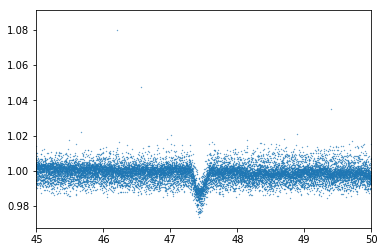

In [162]:
plt.scatter(time-time[0],flux,s=0.1)
plt.xlim(45,50)